# Datenquellen und Exploration

### Laden und Explorieren der Daten

In [1]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import warnings
import numpy as np

class StockDataAnalyzer:
    def __init__(self, csv_filename="aktien_daten.csv"):
        """
        Initialisiert den StockDataAnalyzer mit dem Dateinamen für die CSV-Datei.
        
        Args:
            csv_filename (str): Der Name der CSV-Datei, in der die Daten gespeichert werden.
        """
        self.csv_filename = csv_filename
        self.data = None
    
    def load_stock_data(self, ticker_symbol, years=5):
        """
        Lädt Aktiendaten für einen bestimmten Ticker und eine bestimmte Anzahl von Jahren.
        
        Args:
            ticker_symbol (str): Das Ticker-Symbol der Aktie (z.B. "MSFT" für Microsoft)
            years (int oder float): Die Anzahl der Jahre, für die Daten geladen werden sollen
        
        Returns:
            pandas.DataFrame: Der heruntergeladene Datensatz
        """
        # Warnungen unterdrücken
        warnings.filterwarnings('ignore')
        
        # Zeitraumstring erstellen
        period = f"{years}y"
        
        print(f"Lade Daten für {ticker_symbol} über einen Zeitraum von {years} Jahren...")
        
        # Ticker-Objekt abrufen
        stock = yf.Ticker(ticker_symbol)
        
        # Historische Daten herunterladen
        self.data = stock.history(period=period)
        
        # Die ersten Zeilen der Daten anzeigen
        print(f"Daten erfolgreich geladen. Hier ist eine Vorschau:")
        print(self.data.head())
        
        # Daten als CSV speichern
        self.data.to_csv(self.csv_filename)
        print(f"Daten wurden in {self.csv_filename} gespeichert.")
        
        return self.data
    
    def analyze_dataset(self):
        """
        Analysiert den geladenen Datensatz und gibt Informationen über seine Größe aus.
        
        Returns:
            tuple: (Anzahl der Zeilen, Anzahl der Spalten)
        """
        if self.data is None:
            # Versuche, die CSV-Datei zu laden, falls noch keine Daten geladen wurden
            try:
                print(f"Keine Daten im Speicher. Versuche, Daten aus {self.csv_filename} zu laden...")
                self.data = pd.read_csv(self.csv_filename)
                # Wenn die erste Spalte ein Datum ist, setze es als Index
                if 'Date' in self.data.columns:
                    self.data['Date'] = pd.to_datetime(self.data['Date'])
                    self.data.set_index('Date', inplace=True)
                elif self.data.columns[0] == 'Unnamed: 0':
                    # Häufiges Muster bei gespeicherten CSVs aus yfinance
                    self.data.set_index(self.data.columns[0], inplace=True)
                    self.data.index = pd.to_datetime(self.data.index)
            except FileNotFoundError:
                raise ValueError(f"Keine Daten geladen und die Datei {self.csv_filename} wurde nicht gefunden.")
        
        # Anzahl der Zeilen und Spalten bestimmen
        rows, columns = self.data.shape
        print(f"Der Datensatz enthält {rows} Zeilen und {columns} Spalten.")
        
        return rows, columns
    
    def check_missing_data(self):
        """
        Prüft auf fehlende Daten im Datensatz.
        
        Returns:
            pandas.Series: Anzahl der fehlenden Werte pro Spalte
        """
        if self.data is None:
            self.analyze_dataset()  # Lädt die Daten, falls sie noch nicht geladen wurden
        
        # Anzahl der fehlenden Werte pro Spalte
        missing = self.data.isna().sum()
        
        # Gesamtzahl der fehlenden Werte
        total_missing = missing.sum()
        
        print(f"Gesamtzahl der fehlenden Werte: {total_missing}")
        print("\nFehlende Werte pro Spalte:")
        for col, count in missing.items():
            if count > 0:
                print(f"{col}: {count} ({100 * count / len(self.data):.2f}%)")
        
        return missing
    
    def plot_stock_prices(self, columns=None):
        """
        Erstellt einen Plot der Aktienkurse.
        
        Args:
            columns (list, optional): Liste der zu plottenden Spalten. 
                                     Default ist ['Close'], wenn verfügbar.
        """
        if self.data is None:
            self.analyze_dataset()
        
        if columns is None:
            if 'Close' in self.data.columns:
                columns = ['Close']
            else:
                columns = [self.data.columns[0]]  # Nimm die erste Spalte
        
        plt.figure(figsize=(12, 6))
        
        for col in columns:
            if col in self.data.columns:
                plt.plot(self.data.index, self.data[col], label=col)
        
        plt.title('Aktienkursverlauf')
        plt.xlabel('Datum')
        plt.ylabel('Preis')
        plt.legend()
        plt.grid(True)
        plt.tight_layout()
        plt.show()

/Users/kaihufnagel/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


### Ausführen der Klasse

Lade Daten für MSFT über einen Zeitraum von 5 Jahren...
Daten erfolgreich geladen. Hier ist eine Vorschau:
                                 Open        High         Low       Close  \
Date                                                                        
2020-05-08 00:00:00-04:00  177.058916  177.078063  175.508291  176.771759   
2020-05-11 00:00:00-04:00  175.307293  179.480593  175.020151  178.743576   
2020-05-12 00:00:00-04:00  178.801023  179.030737  174.493718  174.694717   
2020-05-13 00:00:00-04:00  174.732990  176.168759  168.980337  172.052887   
2020-05-14 00:00:00-04:00  169.937514  172.952636  168.157161  172.799484   

                             Volume  Dividends  Stock Splits  
Date                                                          
2020-05-08 00:00:00-04:00  30877800        0.0           0.0  
2020-05-11 00:00:00-04:00  30892700        0.0           0.0  
2020-05-12 00:00:00-04:00  32038200        0.0           0.0  
2020-05-13 00:00:00-04:00  44711500   

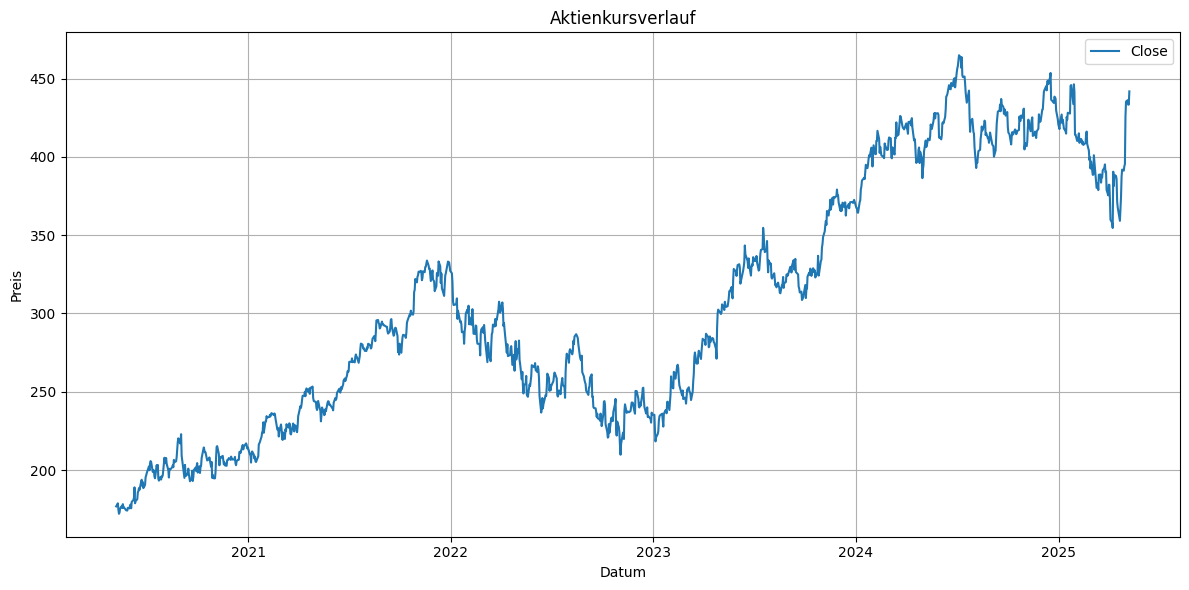

In [2]:
# Verwendung der Klasse
if __name__ == "__main__":
    # Instanz erstellen mit einem benutzerdefinierten CSV-Dateinamen
    analyzer = StockDataAnalyzer("microsoft_aktien_daten.csv")
    
    # Daten über 5 Jahre laden
    analyzer.load_stock_data("MSFT", years=5)
    
    # Datensatz analysieren
    analyzer.analyze_dataset()
    
    # Auf fehlende Daten prüfen
    analyzer.check_missing_data()
    
    # Schlusskurse plotten
    analyzer.plot_stock_prices()